<a href="https://colab.research.google.com/github/AeroEng16/FootballAnalysis/blob/main/trainingPreTrainedYoloV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import requests
import re
import json
import datetime
import pandas as pd
from PIL import Image, ImageDraw
from io import BytesIO

In [2]:
url = 'https://raw.githubusercontent.com/AeroEng16/FootballAnalysis/main/retrainingDataset/_annotations.coco'

resp = requests.get(url)
data = json.loads(resp.text)

json_formatted_str = json.dumps(data, indent=2)

In [22]:
imageID = 18
particularImage = [x for x in data['images'] if x['id'] == imageID]
boundingBoxes = [x for x in data['annotations'] if x['image_id'] == imageID]


In [19]:
imageURL = "https://raw.githubusercontent.com/AeroEng16/FootballAnalysis/main/retrainingDataset/"+particularImage[0]['file_name']+"?raw=true"
imageURL

response = requests.get(imageURL)
img = Image.open(BytesIO(response.content))
img1 = ImageDraw.Draw(img)


#display(img)

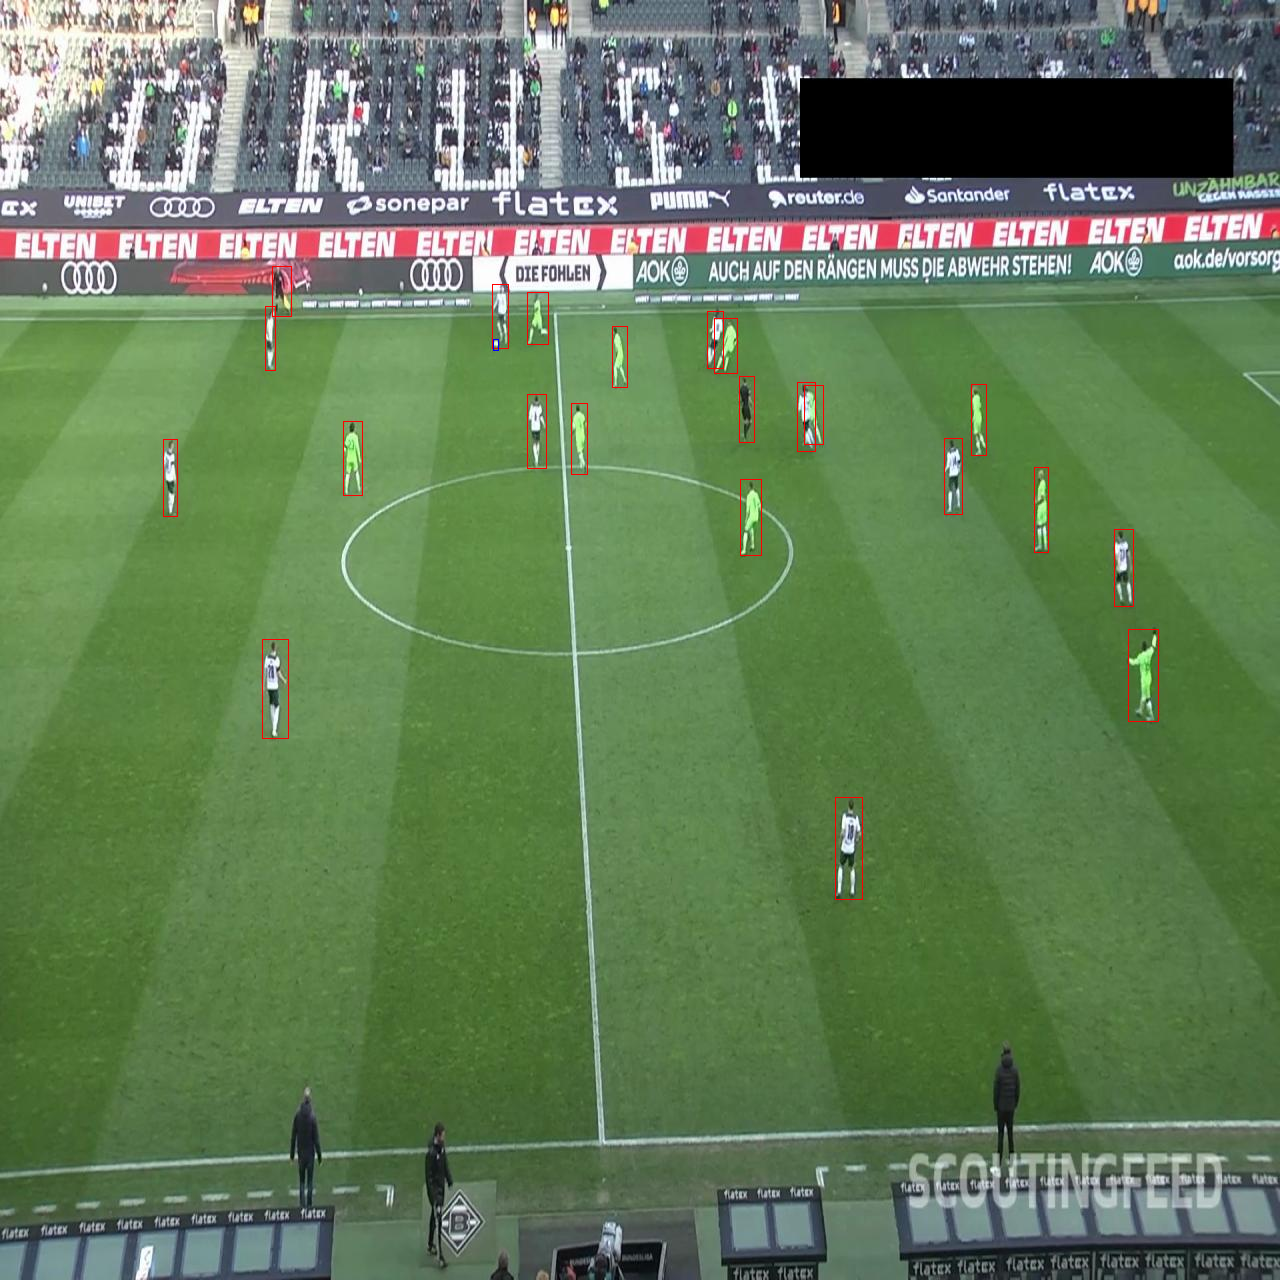

In [21]:
for box in boundingBoxes:
  shape = [(box['bbox'][0], box['bbox'][1]), (box['bbox'][0]+box['bbox'][2], box['bbox'][1]+box['bbox'][3])]
  if box['category_id'] == 3:
    img1.rectangle(shape, outline ="red")
  if box['category_id'] == 1:
    img1.rectangle(shape, outline ="blue")
display(img)